# 一节课入门python可视化

In [ ]:
前言：作者也是刚刚开始入门，在编写过程中参照了十分钟掌握Seaborn，进阶Python数据可视化分析这篇文章
文章链接：https://zhuanlan.zhihu.com/p/49035741

In [94]:
#加载panda和matplotlib.pyplot库
import pandas as pd
import matplotlib.pyplot as plt
#图形显示，能够在Jupyter notebook里面显示
%matplotlib inline
#加载seaborn库
import seaborn as sns
#读取planets.csv数据
fmri= pd.read_csv('fmri.csv')
iris= pd.read_csv('iris.csv')
titanic=pd.read_csv('titanic.csv')

In [95]:
#看fmri数据集的第一行
fmri.head(1)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552


In [96]:
#看iris数据集的第一行
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [97]:
#看titanic数据集的第一行
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [63]:
#随机查看fmri数据集的10行数据
fmri.sample(10)

,subject,timepoint,event,region,signal
386,s9,8,stim,frontal,-0.067074
396,s5,9,stim,frontal,-0.097376
323,s1,4,stim,frontal,0.202123
378,s1,8,stim,frontal,0.036685
1051,s8,8,cue,frontal,0.007278
736,s4,7,cue,parietal,-0.108222
26,s2,17,stim,parietal,-0.077292
429,s10,11,stim,frontal,-0.020110
661,s11,6,cue,frontal,0.005734
168,s13,6,stim,parietal,0.291884


In [79]:
#随机查看iris数据集的10行数据
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
58,6.6,2.9,4.6,1.3,versicolor
67,5.8,2.7,4.1,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
53,5.5,2.3,4.0,1.3,versicolor
76,6.8,2.8,4.8,1.4,versicolor
8,4.4,2.9,1.4,0.2,setosa
74,6.4,2.9,4.3,1.3,versicolor
75,6.6,3.0,4.4,1.4,versicolor
42,4.4,3.2,1.3,0.2,setosa
86,6.7,3.1,4.7,1.5,versicolor


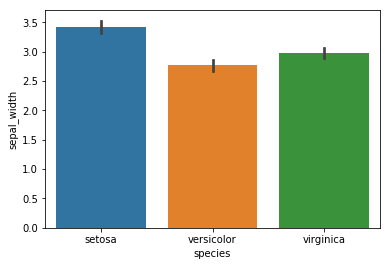

In [80]:
#直方图：x为分类变量，y为数值型变量
sns.barplot(x='species',y='sepal_width',data=iris)

## 第一：distplot直方图

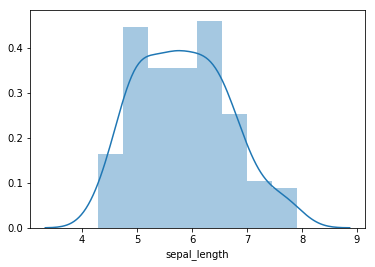

In [81]:
#k看分布，distplot() 默认拟合出了密度曲线
iris1=iris['sepal_length']
sns.distplot(iris1)

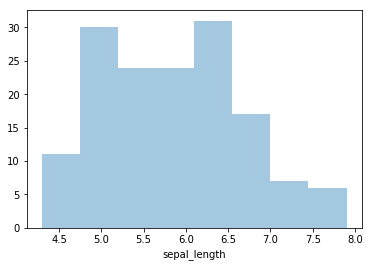

In [82]:
#去掉拟合的密度估计曲线，kde参数设为False
sns.distplot(iris1,kde=False)

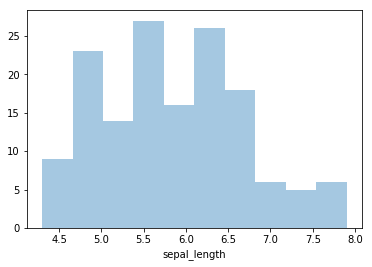

In [83]:
# 通过'bins'参数设定数据片段的数量
sns.distplot(iris1,bins=10,kde=False)

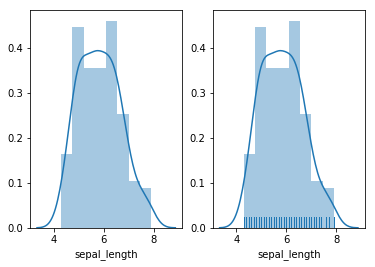

In [84]:
#创建一个一行2列的画布  fig=figure空白画布  axes坐标轴
fig,axes=plt.subplots(1,2)


#设置'rug'参数，加上观测数值的边际毛毯
#需要用axes[]表示是第几张图，从0开始
sns.distplot(iris1,ax=axes[0]) #第一张图
sns.distplot(iris1,rug=True,ax=axes[1]) #第二张图

hist_kws：以字典形式传递直方图的其他修饰属性，如填充色、边框色、宽度等。
kde_kws：以字典形式传递核密度图的其他修饰属性，如线的颜色、线的类型等。
rug_kws：以字典形式传递须图的其他修饰属性，如线的颜色、线的宽度等。
fit_kws：以字典形式传递概率密度曲线的其他修饰属性，如线条颜色、形状、宽度等。

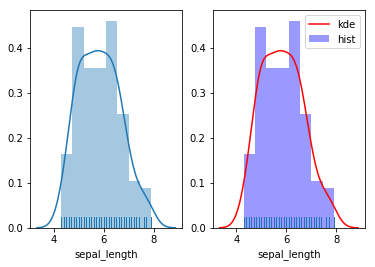

In [85]:
fig,axes=plt.subplots(1,2) 
sns.distplot(iris1,rug=True,ax=axes[0])
sns.distplot(iris1,rug=True,
                     hist_kws={'color':'blue','label':'hist'},
                     kde_kws={'color':'red','label':'kde'},
                     ax=axes[1])

## 第二：barplot条形图

这里我们用fmri数据集，还是先看一个这个数据集

In [86]:
#随机查看fmri数据集的10行数据
fmri.sample(10)

,subject,timepoint,event,region,signal
509,s7,17,stim,frontal,0.001212
995,s13,1,cue,frontal,-0.010346
480,s5,15,stim,frontal,-0.028027
103,s9,11,stim,parietal,-0.072241
635,s1,5,cue,frontal,0.128592
423,s4,11,stim,frontal,-0.107947
1057,s2,8,cue,frontal,-0.069666
693,s3,15,cue,frontal,-0.022377
910,s0,11,cue,parietal,-0.039002
763,s7,7,cue,parietal,0.030375


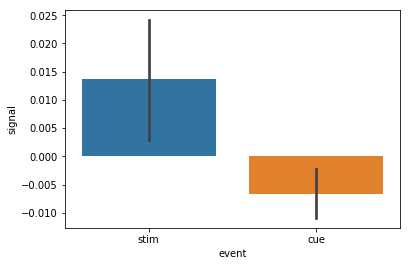

In [87]:
sns.barplot(x='event',y='signal',data=fmri)

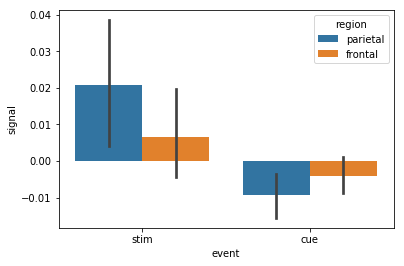

In [90]:
sns.barplot(x='event',y='signal',hue='region',data=fmri)

In [ ]:
做这个图的时候出现了这个错误：SyntaxError: invalid character in identifier  一般都是中英文符号或者多加了空格、标点一类的错误

## 第三：countplot计数图

这里用titanic的数据集

In [98]:
#随机查看titanic数据集的10行数据
titanic.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
764,0,3,male,16.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
649,1,3,female,23.0,0,0,7.5500,S,Third,woman,False,NaN,Southampton,yes,True
620,0,3,male,27.0,1,0,14.4542,C,Third,man,True,NaN,Cherbourg,no,False
342,0,2,male,28.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
416,1,2,female,34.0,1,1,32.5000,S,Second,woman,False,NaN,Southampton,yes,False
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
680,0,3,female,NaN,0,0,8.1375,Q,Third,woman,False,NaN,Queenstown,no,True
543,1,2,male,32.0,1,0,26.0000,S,Second,man,True,NaN,Southampton,yes,False
430,1,1,male,28.0,0,0,26.5500,S,First,man,True,C,Southampton,yes,True
247,1,2,female,24.0,0,2,14.5000,S,Second,woman,False,NaN,Southampton,yes,False


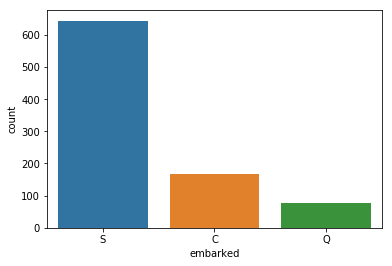

In [99]:
sns.countplot(x='embarked',data=titanic)

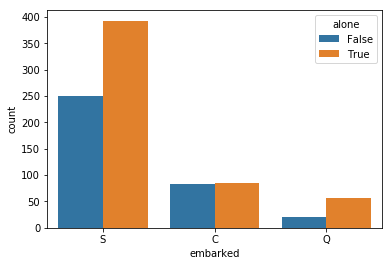

In [100]:
#用hue参数分类
sns.countplot(x='embarked',hue='alone',data=titanic)

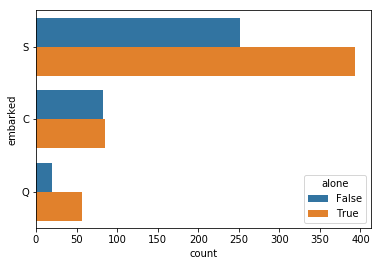

In [101]:
#用纵轴表示
sns.countplot(y='embarked',hue='alone',data=titanic)

## 第四：stripplot/swarmplot散点图

In [103]:
#随机查看titanic数据集的10行数据
titanic.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
186,1,3,female,NaN,1,0,15.5000,Q,Third,woman,False,NaN,Queenstown,yes,False
797,1,3,female,31.0,0,0,8.6833,S,Third,woman,False,NaN,Southampton,yes,True
560,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
582,0,2,male,54.0,0,0,26.0000,S,Second,man,True,NaN,Southampton,no,True
717,1,2,female,27.0,0,0,10.5000,S,Second,woman,False,E,Southampton,yes,True
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
720,1,2,female,6.0,0,1,33.0000,S,Second,child,False,NaN,Southampton,yes,False
46,0,3,male,NaN,1,0,15.5000,Q,Third,man,True,NaN,Queenstown,no,False
146,1,3,male,27.0,0,0,7.7958,S,Third,man,True,NaN,Southampton,yes,True


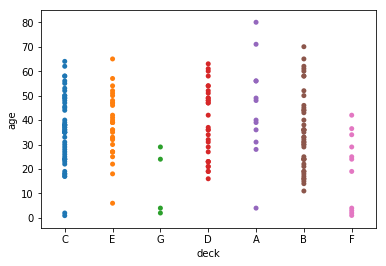

In [105]:
sns.stripplot(x='deck',y='age',data=titanic)

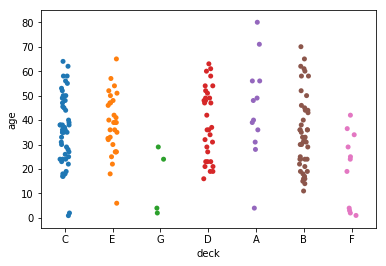

In [107]:
#jitter设置抖动  抖动程度可以自己进行调试
sns.stripplot(x='deck',y='age',data=titanic,jitter=0.1)

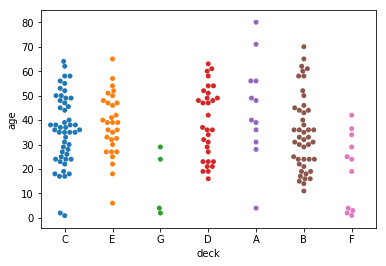

In [108]:
sns.swarmplot(x='deck',y='age',data=titanic)

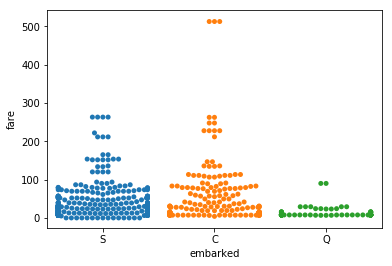

In [110]:
sns.swarmplot(x='embarked',y='fare',data=titanic)

通过比较可以看的swarmplot() 方法的点是不重叠的。但是如果数据过大或者是x的分类过多图的效果就不是很好

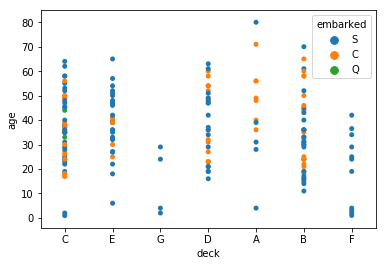

In [113]:
#通过hue来进行分类，seaborn中会用颜色进行区分
sns.stripplot(x='deck',y='age',hue='embarked',data=titanic)

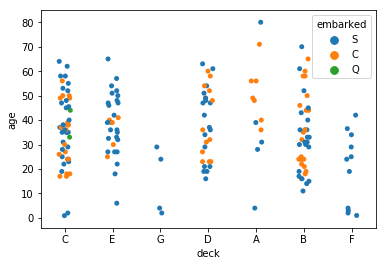

In [118]:
#可以加一点抖动，使得区分的更开一点
sns.stripplot(x='deck',y='age',hue='embarked',data=titanic,jitter=0.12)

## 第五：boxplot 箱线图

直接根据embarked进行分类，看不同deck下age的分布，最大值、最小值、中位数及上下四分位数

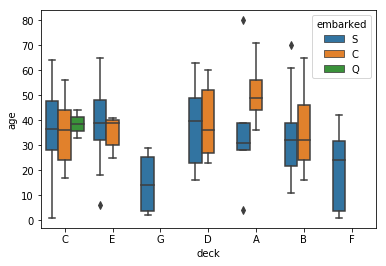

In [119]:
sns.boxplot(x='deck',y='age',hue='embarked',data=titanic)

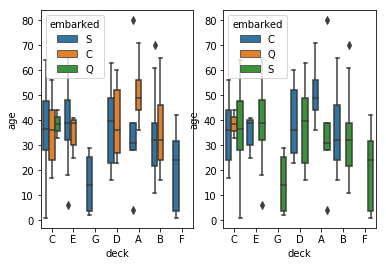

In [124]:
#调节'order' 和 'hue_order' 参数，控制x轴展示的顺序。做一个对比
fig,axes=plt.subplots(1,2) 

sns.boxplot(x='deck',y='age',hue='embarked',data=titanic,ax=axes[0])
sns.boxplot(x='deck',y='age',hue='embarked',data=titanic,hue_order=['C','Q','S'],ax=axes[1])

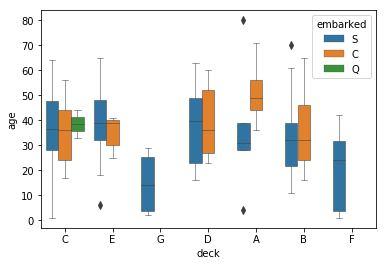

In [126]:
#linewidth控制线条粗细
sns.boxplot(x='deck',y='age',hue='embarked',linewidth=0.5,data=titanic)

## 第六：violinplot 小提琴图

箱线图与核密度图的结合

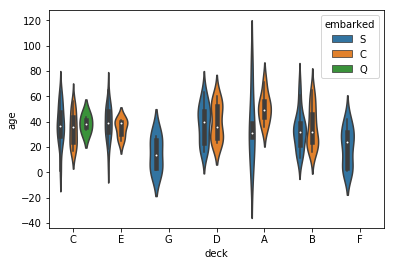

In [127]:
sns.violinplot(x='deck',y='age',hue='embarked',data=titanic)

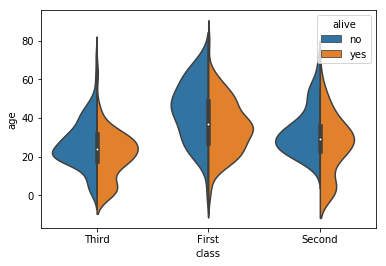

In [128]:
#当hue参数只有两个级别时，也可以通过设置'split'参数为True，“拆分”小提琴，提琴两边分别表示两个分类的情况，这样可以更有效地利用空间。
sns.violinplot(x='class',y='age',hue='alive',data=titanic,split=True)

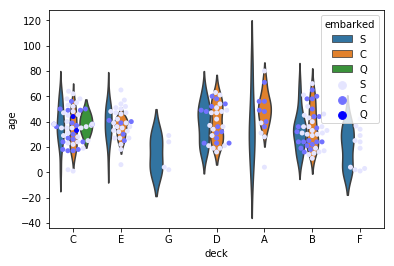

In [129]:
#我们可以更改里面的图形，可以不是箱线图，可以换成散点图或者直方图啊都可以
sns.violinplot(x='deck',y='age',hue='embarked',data=titanic,inner=None)
sns.swarmplot(x='deck',y='age',hue='embarked',data=titanic,color='blue')

## 第七：regplot/lmplot回归图

In [130]:
#随机查看数据集的10行数据
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,setosa
117,7.7,3.8,6.7,2.2,virginica
27,5.2,3.5,1.5,0.2,setosa
17,5.1,3.5,1.4,0.3,setosa
39,5.1,3.4,1.5,0.2,setosa
62,6.0,2.2,4.0,1.0,versicolor
23,5.1,3.3,1.7,0.5,setosa
21,5.1,3.7,1.5,0.4,setosa
129,7.2,3.0,5.8,1.6,virginica
135,7.7,3.0,6.1,2.3,virginica


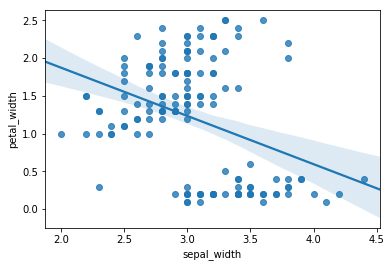

In [135]:
#看一下sepal_width和spetal_width之间的关系
sns.regplot(x='sepal_width',y='petal_width',data=iris)

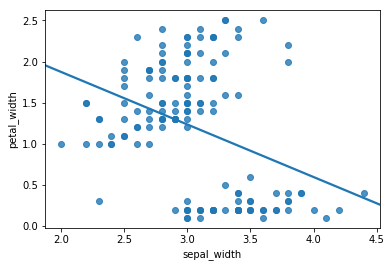

In [136]:
#ci可以控制置信区间Confidence interval
sns.regplot(x='sepal_width',y='petal_width',data=iris,ci=None)

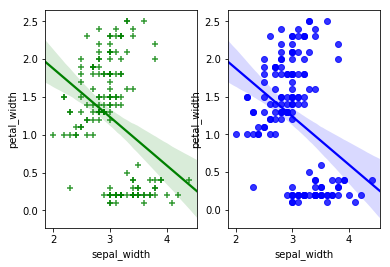

In [138]:
#color'和'marker'参数来控制图形的颜色以及数据点的形状
fig,axes=plt.subplots(1,2) 

sns.regplot(x='sepal_width',y='petal_width',data=iris,color='g',marker='+',ax=axes[0])
sns.regplot(x='sepal_width',y='petal_width',data=iris,color='b',marker='o',ax=axes[1])

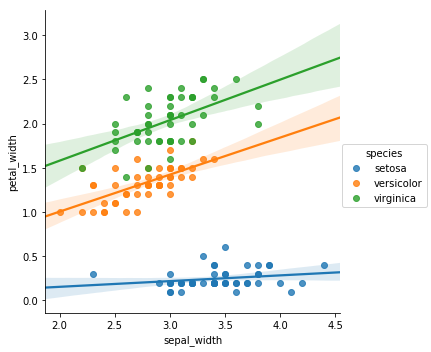

In [139]:
#lmplot() 可以设置hue，分类显示
sns.lmplot(x='sepal_width',y='petal_width',hue='species',data=iris)

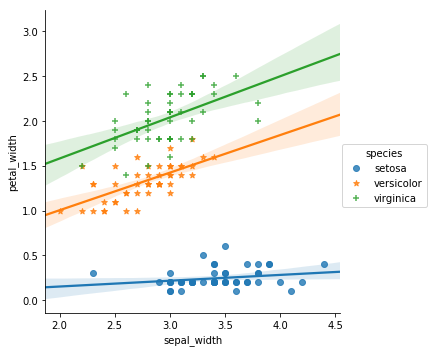

In [141]:
#点的形状进行区分
sns.lmplot(x='sepal_width',y='petal_width',hue='species',data=iris,markers=['o','*','+'])

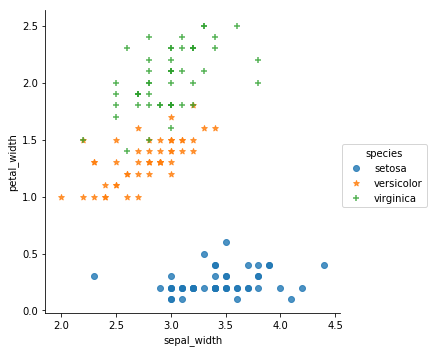

In [143]:
#fit_reg参数，是否显示拟合的直线
sns.lmplot(x='sepal_width',y='petal_width',hue='species',data=iris,markers=['o','*','+'],fit_reg=False)

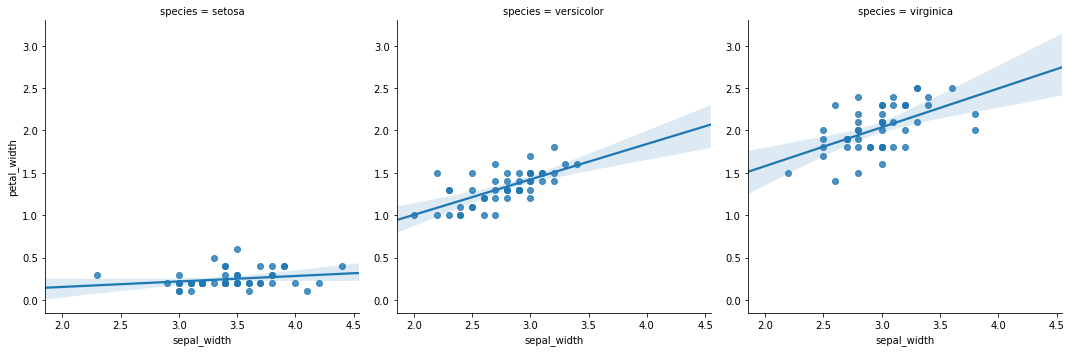

In [145]:
#分类别画在不同的图中   这里markers=['o','*','+'加上是不显示的
sns.lmplot(x='sepal_width',y='petal_width',col='species',data=iris)

## 第八：其他

图形背景

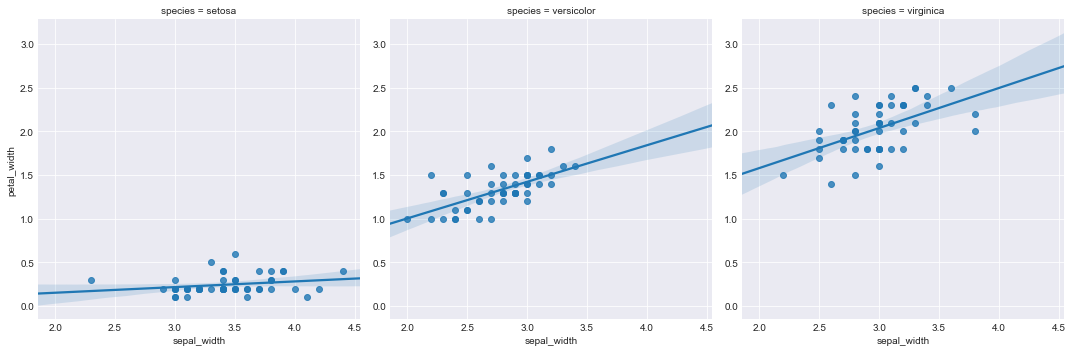

In [146]:
#Seaborn 中有 white / whitegrid / dark / darkgrid / ticks 几种样式，用 set_style() 函数控制 个人比较喜欢darkgrid ，grid就是网格的意思
sns.set_style("darkgrid")
sns.lmplot(x='sepal_width',y='petal_width',col='species',data=iris)

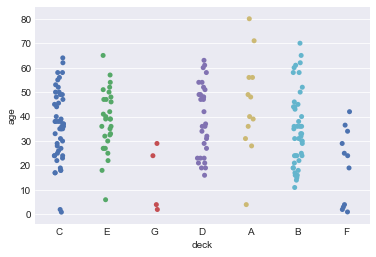

In [147]:
#color_palette() 函数控制颜色deep, muted, pastel, bright, dark, colorblind  set_palette() 自定义图形颜色
sns.stripplot(x='deck',y='age',data=titanic,jitter=0.1,palette=sns.color_palette('deep'))

In [ ]:
数据可视化之路刚刚迈出第一步，对seaborn进行了简单的了解，每一张图要想画好还需要更多的功夫
再次感谢DataCastle数据城堡的这篇文章，期待自己的不断进阶。